In [ ]:
#Code for the "Is the immigration in Barcelona the cause of the Spain-born citizens’ emigration?" mini article
#Author: Sergi Martínez Galindo (unless said differently)

In [47]:
#libraries to use
import pandas as pd
from os.path import exists
from os import makedirs
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [48]:
#reading the data (code from Pablo Barquin Soria)
data_folder="../data/"

# Merge data of CSV files we are going to use 

#-----------------------------------------------------------------------------------
#INSIDE VS OUTSIDE

# Define data path
dataPath = "../data/birthPlace_spain_v_outside/"
mergedPath = "../data/merged_data/"
if not exists(mergedPath):
    makedirs(mergedPath)


# Define file paths for each year
def merge_csvs_explicit():
    years = range(1997, 2026)  # Only up to 2025 (existing data)
    
    dfs = []
    for year in years:
        file_path = f"{dataPath}{year}_birthPlace_spain_v_outside.csv"
        try:
            df = pd.read_csv(file_path, delimiter=",")
            # Replace ".." with 0 in column "Value" and coerce to numeric
            if "Value" in df.columns:
                df["Value"] = df["Value"].replace("..", 0)
                df["Value"] = pd.to_numeric(df["Value"], errors="coerce").fillna(0)
            dfs.append(df)
            print(f"Successfully read {year}")
        except FileNotFoundError:
            print(f"Warning: File for year {year} not found")
    
    if dfs:
        df_all_years = pd.concat(dfs, ignore_index=True)
        print(f"Successfully merged {len(dfs)} files")
        return df_all_years
    else:
        print("No files were found to merge")
        return None


# Concatenate all DataFrames into a single DataFrame
df_combined = merge_csvs_explicit()  # or merge_csvs_explicit()
# Save the combined DataFrame to a new CSV file
df_combined.to_csv(f"{mergedPath}merged_birthPlace_spain_v_outside.csv", index=False)
print("Merged data saved to merged_birthPlace_spain_v_outside.csv")


#----------------------------------------------------------------------------------------
#BIRTH REGION
# Define data path
dataPath = "../data/birthPlaceRegion/"
mergedPath = "../data/merged_data/"
if not exists(mergedPath):
    makedirs(mergedPath)


# Define file paths for each year
def merge_csvs_explicit():
    years = range(1997, 2026)  # Only up to 2024 (existing data)
    
    dfs = []
    for year in years:
        file_path = f"{dataPath}{year}_birthPlaceRegion_sex.csv"
        try:
            df = pd.read_csv(file_path, delimiter=",")
            # Replace ".." with 0 in column "Value" and coerce to numeric
            if "Value" in df.columns:
                df["Value"] = df["Value"].replace("..", 0)
                df["Value"] = pd.to_numeric(df["Value"], errors="coerce").fillna(0)
            dfs.append(df)
            print(f"Successfully read {year}")
        except FileNotFoundError:
            print(f"Warning: File for year {year} not found")
    
    if dfs:
        df_all_years = pd.concat(dfs, ignore_index=True)
        print(f"Successfully merged {len(dfs)} files")
        return df_all_years
    else:
        print("No files were found to merge")
        return None


# Concatenate all DataFrames into a single DataFrame
df_combined_2 = merge_csvs_explicit()  # or merge_csvs_explicit()
# Save the combined DataFrame to a new CSV file
df_combined_2.to_csv(f"{mergedPath}merged_birthPlaceRegion_sex.csv", index=False)
print("Merged data saved to merged_birthPlaceRegion_sex.csv")


Successfully read 1997
Successfully read 1998
Successfully read 1999
Successfully read 2000
Successfully read 2001
Successfully read 2002
Successfully read 2003
Successfully read 2004
Successfully read 2005
Successfully read 2006
Successfully read 2007
Successfully read 2008
Successfully read 2009
Successfully read 2010
Successfully read 2011
Successfully read 2012
Successfully read 2013
Successfully read 2014
Successfully read 2015
Successfully read 2016
Successfully read 2017
Successfully read 2018
Successfully read 2019
Successfully read 2020
Successfully read 2021
Successfully read 2022
Successfully read 2023
Successfully read 2024
Successfully read 2025
Successfully merged 29 files
Merged data saved to merged_birthPlace_spain_v_outside.csv
Successfully read 1997
Successfully read 1998
Successfully read 1999
Successfully read 2000
Successfully read 2001
Successfully read 2002
Successfully read 2003
Successfully read 2004
Successfully read 2005
Successfully read 2006
Successfully re

In [49]:
#figures_path, create a folder to save the future figures locally
figure_path="figures_sergi/"
if not exists(figure_path):
    makedirs(figure_path)


#we define a function to save the data_frames created for the different figures
def create_csv(name,data_frame):
    """Creates a csv in the local data directory for the data_frame with the 
    name introduce as input."""
    #csv_path
    csv_path="../data/sergi_data_frames/"
    if not exists(csv_path):
        makedirs(csv_path)
    # Save the combined DataFrame to a new CSV file
    data_frame.to_csv(f"{csv_path+name}.csv", index=False)


In [50]:
#INSIDE vs OUTSIDE 
#we don"t need the census_section or the AEB (we will work with city, districts or neighborhoods)
df_combined=df_combined.drop(columns=["AEB"])
# we group by neighborhoods
df_combined = (
    df_combined.groupby(
        ["Year_Reference", "District", "Neighborhood", "Birth_Place", "Sex"],  
        as_index=False
    )["Value"].sum()
)
df_in_vs_out=df_combined
display(df_in_vs_out)


,Year_Reference,District,Neighborhood,Birth_Place,Sex,Value
0,1997,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",City of Barcelona,Female,5526
1,1997,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",City of Barcelona,Male,4907
2,1997,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",Not available,Female,0
3,1997,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",Rest of Catalonia,Female,930
4,1997,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",Rest of Catalonia,Male,653
...,...,...,...,...,...,...
23718,2025,Sarrià-Sant Gervasi,les Tres Torres,Rest of European Union,Male,338
23719,2025,Sarrià-Sant Gervasi,les Tres Torres,Rest of Spain,Female,896
23720,2025,Sarrià-Sant Gervasi,les Tres Torres,Rest of Spain,Male,633
23721,2025,Sarrià-Sant Gervasi,les Tres Torres,Rest of World,Female,1428


In [51]:
#BIRTH REGION
#we already have the same format as in df_in_vs_out
df_regions=df_combined_2
df_regions

,Year_Reference,District,Neighborhood,Value,Birth_Place_Region,Sex
0,1997,Ciutat Vella,el Raval,0,Eastern Africa,Female
1,1997,Ciutat Vella,el Raval,0,Eastern Africa,Male
2,1997,Ciutat Vella,el Raval,5,Middle Africa,Female
3,1997,Ciutat Vella,el Raval,5,Middle Africa,Male
4,1997,Ciutat Vella,el Raval,441,Northern Africa,Female
...,...,...,...,...,...,...
72893,2025,Sant Martí,la Verneda i la Pau,100,Western Europe,Male
72894,2025,Sant Martí,la Verneda i la Pau,0,Australia and New Zealand,Female
72895,2025,Sant Martí,la Verneda i la Pau,0,Australia and New Zealand,Male
72896,2025,Sant Martí,la Verneda i la Pau,0,Not available,Female


In [52]:
#For the first data set we want to get the total number of Spanish (born in Spain) people,
# total number of immigrants and the total number of habitants in each Neighborhood

#we combine the values from the two genders: Male and Female
df_sum_gender = (df_in_vs_out.groupby(["Year_Reference", "District", "Neighborhood", "Birth_Place"],\
    as_index=False)["Value"].sum())

#Spanish people
spain = df_sum_gender[df_sum_gender["Birth_Place"].isin(["City of Barcelona", "Rest of Catalonia",\
        "Rest of Spain"])].groupby(["Year_Reference","District","Neighborhood"], as_index=False)["Value"].sum().\
        rename(columns={"Value":"Population_Spain"})

#Immigrants
outside=df_sum_gender[df_sum_gender["Birth_Place"].isin(["Rest of European Union","Rest of World"])]\
        .groupby(["Year_Reference","District","Neighborhood"], as_index=False)["Value"].sum().\
        rename(columns={"Value":"Population_Outside"})

spain_vs_outside = pd.merge(spain, outside, on=["Year_Reference","District","Neighborhood"], how="outer").fillna(0)

spain_vs_outside["Total_population"] = spain_vs_outside["Population_Spain"] + spain_vs_outside["Population_Outside"]

spain_vs_outside


,Year_Reference,District,Neighborhood,Population_Spain,Population_Outside,Total_population
0,1997,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",17968,1862,19830
1,1997,Ciutat Vella,el Barri Gòtic,12293,1270,13563
2,1997,Ciutat Vella,el Raval,30186,3908,34094
3,1997,Ciutat Vella,la Barceloneta,14148,590,14738
4,1997,Eixample,Sant Antoni,34625,1335,35960
...,...,...,...,...,...,...
2112,2025,Sarrià-Sant Gervasi,Sant Gervasi - la Bonanova,20330,6496,26826
2113,2025,Sarrià-Sant Gervasi,Sarrià,19396,5874,25270
2114,2025,Sarrià-Sant Gervasi,"Vallvidrera, el Tibidabo i les Planes",3781,1180,4961
2115,2025,Sarrià-Sant Gervasi,el Putxet i el Farró,22314,8433,30747


In [53]:
#Now we want to study how each region of origin affects the local population

#functions
def filtre_regions(llista_regions,data_frame):
    """Returns a data frame with the variation of the locals and percentage of immigrants in two
    consecutive rows for each neighbourhood. The input data frame must have Year Reference, Birth_Place_Region,
    District, Neighborhood, Population Spain, Toal Population, Value."""

    #we select the region
    df_filtrat = data_frame[data_frame["Birth_Place_Region"].isin(llista_regions)]

    #we sum all the subregions in one
    df_sumat = (df_filtrat.groupby(["Year_Reference", "Neighborhood","Total_population","Population_Spain",\
        "District"], as_index=False)["Value"].sum()) 
    
    #percentage
    df_sumat["Percent_region"] = (df_sumat["Value"] / df_sumat["Total_population"] * 100).round(2)
    df_sumat=df_sumat.drop(columns=["Value","Total_population"])
    df = df_sumat.sort_values(["Neighborhood", "Year_Reference"])

    # Population_Spain: (i+1) - i
    df["Pop_Spain_diff"] = df.groupby("Neighborhood")["Population_Spain"].diff(-1) * -1

    # Percent_outside_Spain: i - (i-1)
    df["Perc_Outside_diff"] = df.groupby("Neighborhood")["Percent_region"].diff().round(4)


    # Selection
    result = df[["Neighborhood","District" ,"Year_Reference",
                    "Pop_Spain_diff", "Perc_Outside_diff"]]

    # We delete the rows with NaN"s
    result = result.dropna(subset=["Pop_Spain_diff", "Perc_Outside_diff"])
    return result

def grafics(ax, result):
    """Returns a scatter plot for the data in result (data_frame). It includes it in 
    an existing ax."""
    # Scatter plot with a color for each period
    sc = ax.scatter(
        result["Perc_Outside_diff"], 
        result["Pop_Spain_diff"]/1000, 
        c=result["Year_Reference"],
        cmap="cividis",
        s=80,
        edgecolor="black",
        linewidth=0.5,
        alpha=1
    )

    ax.set_xlabel(r"$\Delta$% Immigrants (i - (i-2))",fontsize=15)
    ax.set_ylabel(r"$\Delta$Total Spain ((i+2) - i) (·10$^3$)",fontsize=15)
    ax.set_xlim(-10.5, 10.5)
    ax.set_ylim(-2, 2)
    ax.axhline(0, color="black", linewidth=1)
    ax.axvline(0, color="black", linewidth=1)
    ax.grid(True, linestyle="--", alpha=0.4)

    return sc

def representacio_regions_districte(regio_nom,regio_label,si,period):
    """Represents all the graphics for each world region for a determined (regio_nom) District/Neighborhood
    (regio_label) (si=True) or all BCN (si=False). If district or global BCN each point of the same color is
    Neighborhood. Period: x years."""

    print(regio_label,": ",regio_nom)

    #Year Filter
    df_combined_3=df_regions[df_regions["Year_Reference"].isin(np.arange(1997,2026,period))]
    spain_vs_outside_2=spain_vs_outside[spain_vs_outside["Year_Reference"].isin(np.arange(1997,2026,period))]


    #Sum women and men
    df_sum_gender = (df_combined_3.groupby(["Year_Reference", "District", "Neighborhood",\
        "Birth_Place_Region"],as_index=False)["Value"].sum())

    #regions (filtered by district or neighborhood?)
    if si==True:
        df_regions_f=df_sum_gender[df_sum_gender[regio_label].isin([regio_nom])]
    else:
        df_regions_f=df_sum_gender


    #We merge the data frames and redefine the Southern Europe region (which originally included Spain)
    df = df_regions_f.merge(spain_vs_outside_2,on=["Neighborhood","Year_Reference","District"], how="left")
    df["Value"] = df.apply(
        lambda row: row["Value"] - row["Population_Spain"]
        if row["Birth_Place_Region"] == "Southern Europe"
        else row["Value"],
        axis=1
    )

    #different regions
    Africa_df=filtre_regions(region_list[0],df)
    Af_As_df=filtre_regions(region_list[1],df)
    SAmerica_df=filtre_regions(region_list[2],df)
    Asia_df=filtre_regions(region_list[3],df)
    Europe_df=filtre_regions(region_list[4],df)
    America_Asutralia=filtre_regions(region_list[5],df)

    llista_resultats=[Africa_df,Af_As_df,SAmerica_df,Asia_df,Europe_df,America_Asutralia]

    #size of the plots (all the same)
    x_max=0
    x_min=0
    y_min=0
    y_max=0
    for i in llista_resultats:
        a=i["Pop_Spain_diff"].max()
        b=i["Pop_Spain_diff"].min()
        c=i["Perc_Outside_diff"].max()
        d=i["Perc_Outside_diff"].min()
        x_max=max(c,x_max)
        x_min=min(d,x_min)
        y_max=max(a,y_max)
        y_min=min(b,y_min)

    print(x_max,x_min,y_max,y_min)
    #values ajusted manually after visualising this print
    
    
    #graphics
    fig, axs = plt.subplots(2, 3, figsize=(16, 9))
    axs = axs.flatten()
    fig.subplots_adjust(hspace=0.2)

    last_scatter = None

    for i in range(6):
        #we save the data_frame
        create_csv(region_names[i]+"_"+regio_nom+"_scatter",llista_resultats[i])
        #we draw the graphic
        ax = axs[i]
        last_scatter = grafics(ax, llista_resultats[i])
        ax.set_title(region_names[i],fontsize=15)
        ax.tick_params(axis="both", labelsize=15)
        if i % 3 != 0: 
            ax.yaxis.set_visible(False)
        if i < 3:
            ax.xaxis.set_visible(False)
        ax.grid(False)

    # Colorbar global
    cbar = fig.colorbar(last_scatter, ax=axs, orientation="vertical")
    cbar.set_label("Year (i)",fontsize=15)

    #move colorbar
    cbar.ax.set_position([0.77, 0.15, 0.02, 0.7])
    cbar.ax.tick_params(axis="both", labelsize=15)

    plt.savefig(figure_path+"scatter_plot.pdf", bbox_inches="tight")
    plt.savefig(figure_path+"scatter_plot.png", bbox_inches="tight")

    plt.show()
    

In [54]:
#regions
region_list = [["Eastern Africa","Middle Africa","Southern Africa","Western Africa"],["Northern Africa","Western Asia"],\
            ["Caribbean","Central America","South America"],["Southern Asia","South-Eastern Asia","Eastern Asia"],\
                ["Eastern Europe","Northern Europe","Southern Europe"],["Australia and New Zealand","Northern America"]]

region_names=["Rest of Africa","NAf-WA","Latin America", "Rest of Asia", "Europe", "NAm-AUS-NZ"]


City :  BCN
10.0 -8.64 1859.0 -1890.0


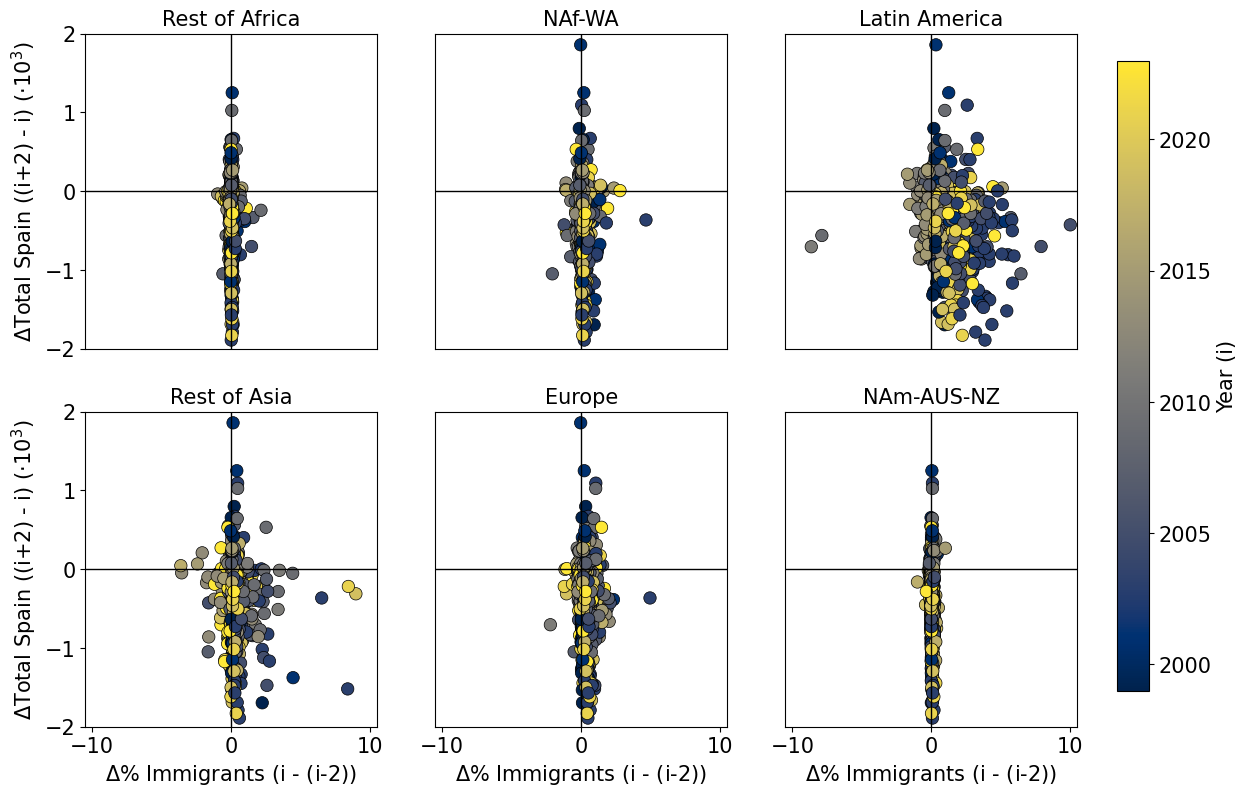

In [55]:
representacio_regions_districte("BCN","City",False,2)


In [56]:
#let's now study the total difference in each year instead of percentages

def filtre_regions_total(llista_regions,data_frame,zona_label):
    """Returns a data frame with the sum of the region list for each year, district or neighborhood (zona_label)
    along the total Spanish population."""
    df_filtrat = data_frame[data_frame["Birth_Place_Region"].isin(llista_regions)]

    #sum for different birth place regions
    df_sumat = (df_filtrat.groupby(["Year_Reference", zona_label,"Population_Spain"]\
        , as_index=False)["Value"].sum()) 
    
    #change of name
    df_sumat["Population_region"] = (df_sumat["Value"])
    df_sumat=df_sumat.drop(columns=["Value"])

    #sorted by year
    df = df_sumat.sort_values([zona_label, "Year_Reference"])

    return df


def region_zone_study(llista_regions,zona_nom,zona_label):
    """Return a data frame containing the evolution of the population difference
    between consecutive years for the Spain-born and the region-born (llista regions)
    population for a determined (zona_nom) district or neighborhood (zona_label).""" 

    #Sum women and men
    df_sum_gender = (df_regions.groupby(["Year_Reference", "District", "Neighborhood",\
        "Birth_Place_Region"],as_index=False)["Value"].sum())

    #filtered by zone
    if zona_label=="Neighborhood":
        df_regions_f=df_sum_gender[df_sum_gender[zona_label].isin([zona_nom])]
        df_regions_f=df_regions_f.drop(columns=["District"])
        df_esp_vs_out=spain_vs_outside
    else: #zona_label==District
        #sum neighborhoods 1
        df_regions_f=df_sum_gender[df_sum_gender[zona_label].isin([zona_nom])]
        df_regions_f = (df_regions_f.groupby(["Year_Reference", "District",\
        "Birth_Place_Region"],as_index=False)["Value"].sum())
        #sum neighborhoods 2
        df_1=(spain_vs_outside.groupby(["Year_Reference", "District"\
        ],as_index=False)["Population_Spain"].sum())
        df_2=(spain_vs_outside.groupby(["Year_Reference", "District"\
        ],as_index=False)["Population_Outside"].sum())
        df_3=(spain_vs_outside.groupby(["Year_Reference", "District"\
        ],as_index=False)["Total_population"].sum())

        df_4= pd.merge(df_2, df_1, on=["Year_Reference","District"], how="outer").fillna(0)
        df_esp_vs_out = pd.merge(df_3, df_4, on=["Year_Reference","District"], how="outer").fillna(0)

    #We merge the data frames and redefine the Southern Europe region
    df = df_regions_f.merge(df_esp_vs_out,on=["Year_Reference",zona_label], how="left")
    df["Value"] = df.apply(
        lambda row: row["Value"] - row["Population_Spain"]
        if row["Birth_Place_Region"] == "Southern Europe"
        else row["Value"],
        axis=1
    )

    #Filter on the studied world region
    df_wr=filtre_regions_total(llista_regions,df,zona_label)

    #Differences
    #any i: value(i)-value(i-1)
    df_wr["D_ESP"] = (
            df_wr.groupby(zona_label)["Population_Spain"].shift(0) -
            df_wr.groupby(zona_label)["Population_Spain"].shift(+1))

    df_wr["D_WR"] = (
            df_wr.groupby(zona_label)["Population_region"].shift(0) -
            df_wr.groupby(zona_label)["Population_region"].shift(+1))

    # Select columns
    result = df_wr[[zona_label, "Year_Reference",
                    "D_ESP", "D_WR"]]

    # Drop rows where centered derivative cannot be computed (edges)
    result = result.dropna(subset=["D_ESP", "D_WR"])

    return result

def region_BCN(llista_regions):
    """Return a data frame containing the evolution of the population difference
    between consecutive years for the Spain-born and the region-born (llista regions)
    population for the city of Barcelona.""" 

    #Sum women and men
    df_sum_gender = (df_regions.groupby(["Year_Reference", "District", "Neighborhood",\
        "Birth_Place_Region"],as_index=False)["Value"].sum())

    #sum neighborhoods and districs 1
    #neighborhoods
    df_regions_f=df_sum_gender
    df_regions_f = (df_regions_f.groupby(["Year_Reference", "District",\
    "Birth_Place_Region"],as_index=False)["Value"].sum())
    #districs
    df_regions_f = (df_regions_f.groupby(["Year_Reference",\
    "Birth_Place_Region"],as_index=False)["Value"].sum())


    #sum neighborhoods i districs 2
    #neighborhoods
    df_1=(spain_vs_outside.groupby(["Year_Reference", "District"\
    ],as_index=False)["Population_Spain"].sum())
    df_2=(spain_vs_outside.groupby(["Year_Reference", "District"\
    ],as_index=False)["Population_Outside"].sum())
    df_3=(spain_vs_outside.groupby(["Year_Reference", "District"\
    ],as_index=False)["Total_population"].sum())

    df_4= pd.merge(df_2, df_1, on=["Year_Reference","District"], how="outer").fillna(0)
    df_esp_vs_out = pd.merge(df_3, df_4, on=["Year_Reference","District"], how="outer").fillna(0)
    #districs
    df_1=(spain_vs_outside.groupby(["Year_Reference"\
    ],as_index=False)["Population_Spain"].sum())
    df_2=(spain_vs_outside.groupby(["Year_Reference"\
    ],as_index=False)["Population_Outside"].sum())
    df_3=(spain_vs_outside.groupby(["Year_Reference"\
    ],as_index=False)["Total_population"].sum())

    df_4= pd.merge(df_2, df_1, on=["Year_Reference"], how="outer").fillna(0)
    df_esp_vs_out = pd.merge(df_3, df_4, on=["Year_Reference"], how="outer").fillna(0)

    #We merge the data frames and redefine the Southern Europe region
    df = df_regions_f.merge(df_esp_vs_out,on=["Year_Reference"], how="left")
    df["Value"] = df.apply(
        lambda row: row["Value"] - row["Population_Spain"]
        if row["Birth_Place_Region"] == "Southern Europe"
        else row["Value"],
        axis=1
    )

    #Filter on the studied world region
    df_filtrat = df[df["Birth_Place_Region"].isin(llista_regions)]

    #sum for different birth place regions
    df_sumat = (df_filtrat.groupby(["Year_Reference","Population_Spain"]\
        , as_index=False)["Value"].sum()) 
    df_sumat["Population_region"] = (df_sumat["Value"])
    df_sumat=df_sumat.drop(columns=["Value"])
    df_wr = df_sumat.sort_values(["Year_Reference"])

    #Differences
    #any i: value(i)-value(i-1)
    df_wr["D_ESP"] = (
            df_wr["Population_Spain"].shift(0) -
            df_wr["Population_Spain"].shift(+1))

    df_wr["D_WR"] = (
            df_wr["Population_region"].shift(0) -
            df_wr["Population_region"].shift(+1))

    # Select columns
    result = df_wr[[ "Year_Reference",
                    "D_ESP", "D_WR"]]

    result = result.dropna(subset=["D_ESP", "D_WR"])

    return result

def bar_plot(data_frame,regio,zona_nom,zona_label):
    """Generates and saves a bar_plot comparing the time evoltion of the
    population variation for the Spain-born and the "regio"-born previously
    calculated and contained in the data_frame that has 3 columns: "Year_Reference",
    "D_ESP" and "D_WR". zona_nom and zona_label are only used for the name of the 
    pdf and png files."""
    # saving the data_frame
    create_csv("bars_"+regio+"_"+zona_nom,data_frame)
    # secure copy
    df = data_frame.copy()
    df = df.dropna(subset=["Year_Reference", "D_ESP", "D_WR"])
    df["Year_Reference"] = df["Year_Reference"].astype(int)
  
    fig, ax = plt.subplots(figsize=(14, 10))
    bar_width = 1.0 

    cmap = plt.get_cmap("cividis")
    
    #Bars
    x_bar = df["Year_Reference"]
    y_WR = df["D_WR"]/1000
    y_ESP = df["D_ESP"]/1000
    if regio=="Rest_of_Asia":
        regio="Rest\:of\:Asia"
    ax.bar(x_bar-1, y_WR, width=bar_width, alpha=0.7, label=r"$\Delta P_{"+regio+r"}$", color=cmap(0),edgecolor="black",\
           zorder=10)
    ax.bar(x_bar-1, y_ESP, width=bar_width, alpha=0.7, label=r"$\Delta P_{Spain}$", color=cmap(0.9),edgecolor="black",\
           zorder=10)

    ax.set_xticks(x_bar[2::5])
    ax.set_xticklabels(df["Year_Reference"].astype(str)[2::5])
    #axis and legend
    ax.set_xlim(1996.5, 2025.5)
    ax.set_xlabel("Year",fontsize=35)
    plt.tick_params(axis="both", labelsize=35)
    ax.set_ylabel(r"$\Delta$ Population (·$10^3$)", fontsize=35)
    ax.legend(fontsize=35, loc="upper center", bbox_to_anchor=(0.5, 1.35), ncol=2)
    plt.tight_layout()
    #saving the graphic
    plt.savefig(figure_path+"bars_"+zona_label+"_"+zona_nom+".pdf", bbox_inches="tight")
    plt.savefig(figure_path+"bars_"+zona_label+"_"+zona_nom+".png", bbox_inches="tight")
    plt.show()


el Raval


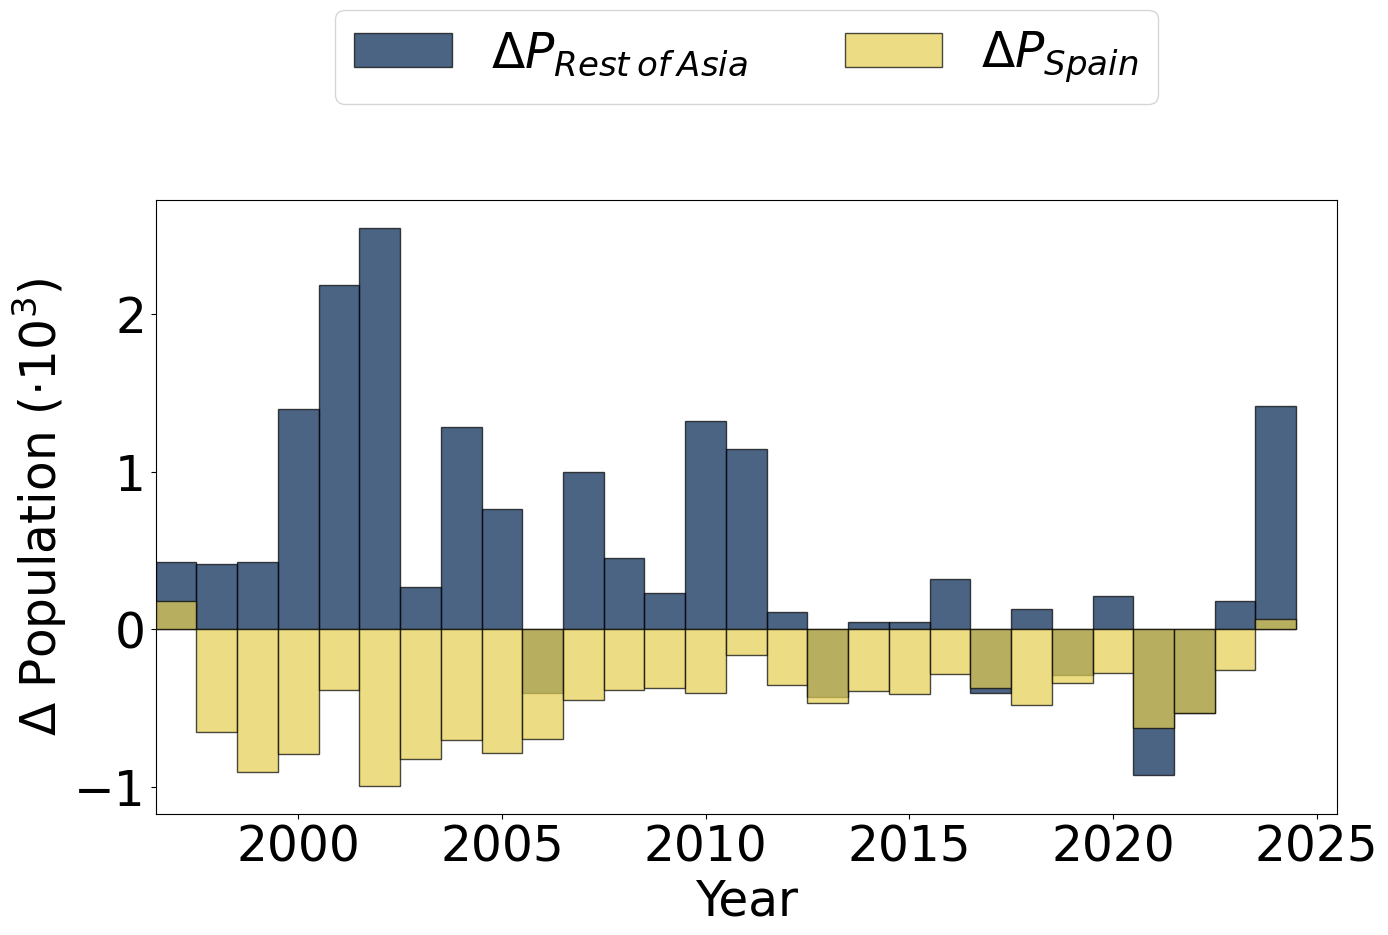

el Barri Gòtic


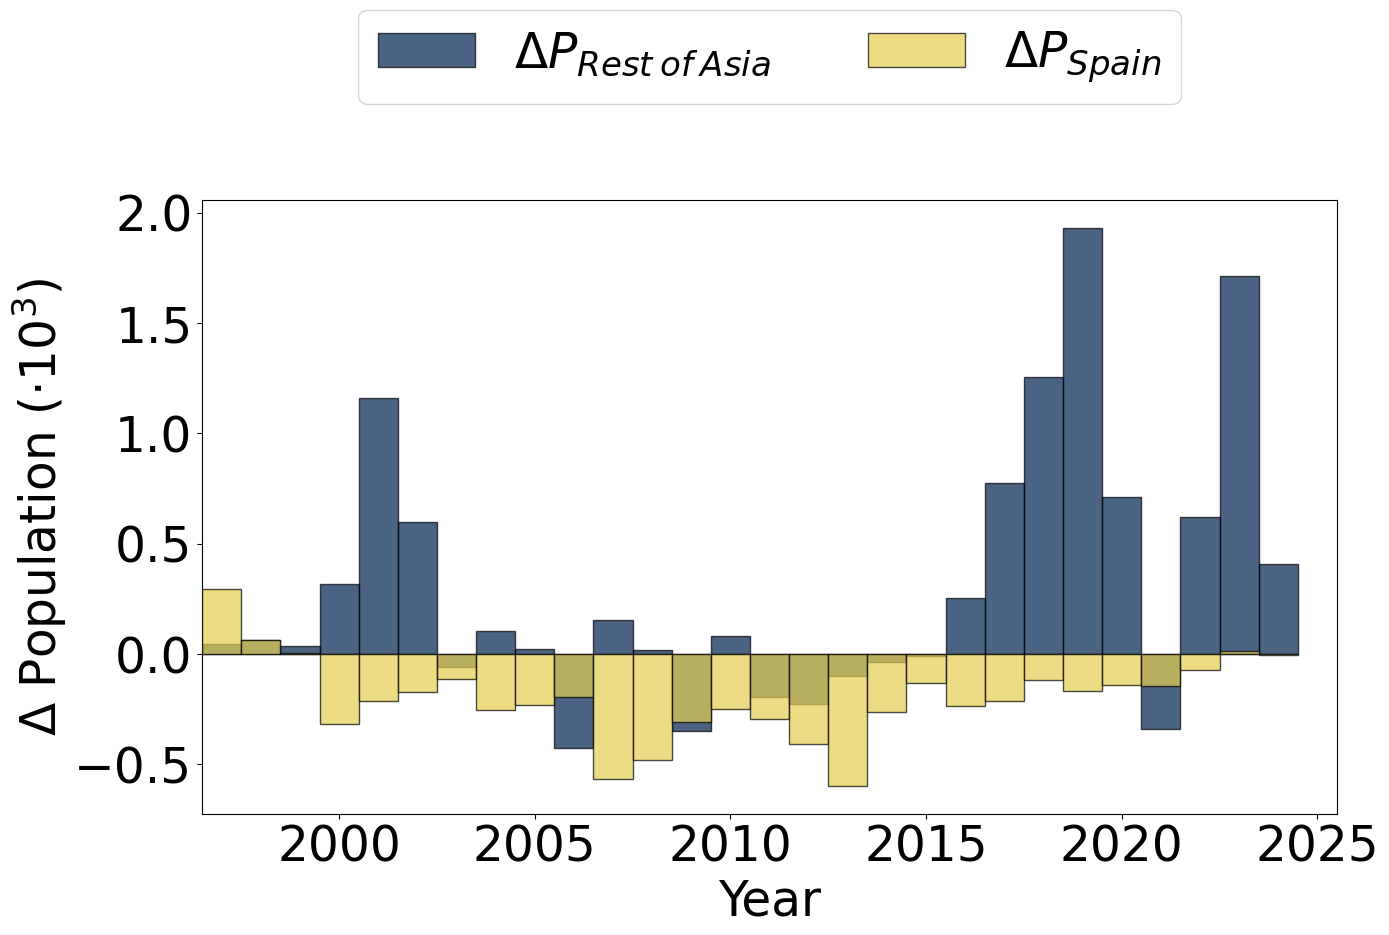

Sarrià


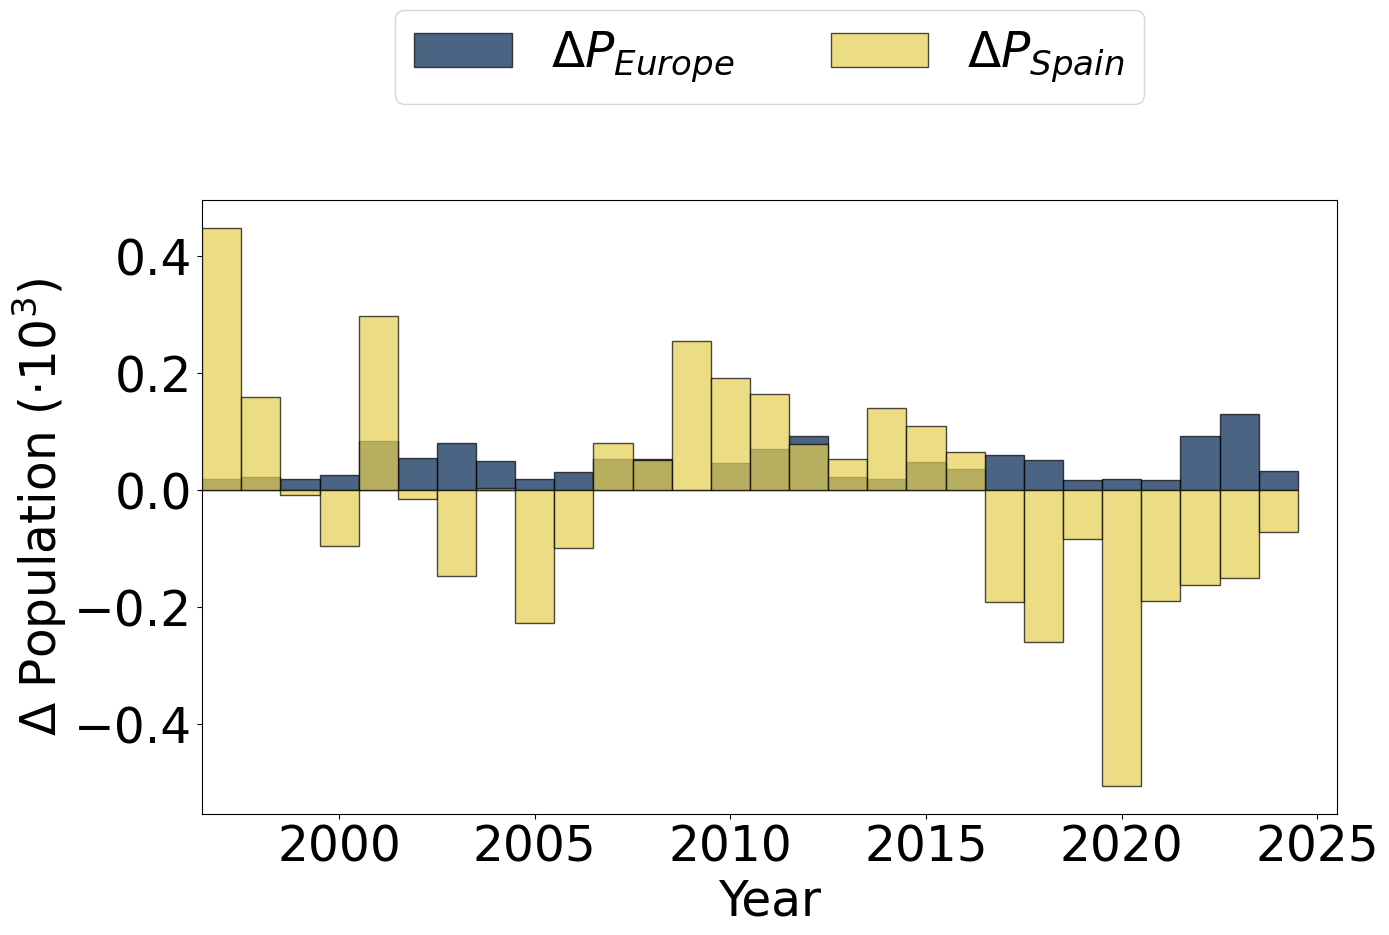

Diagonal Mar i el Front Marítim del Poblenou


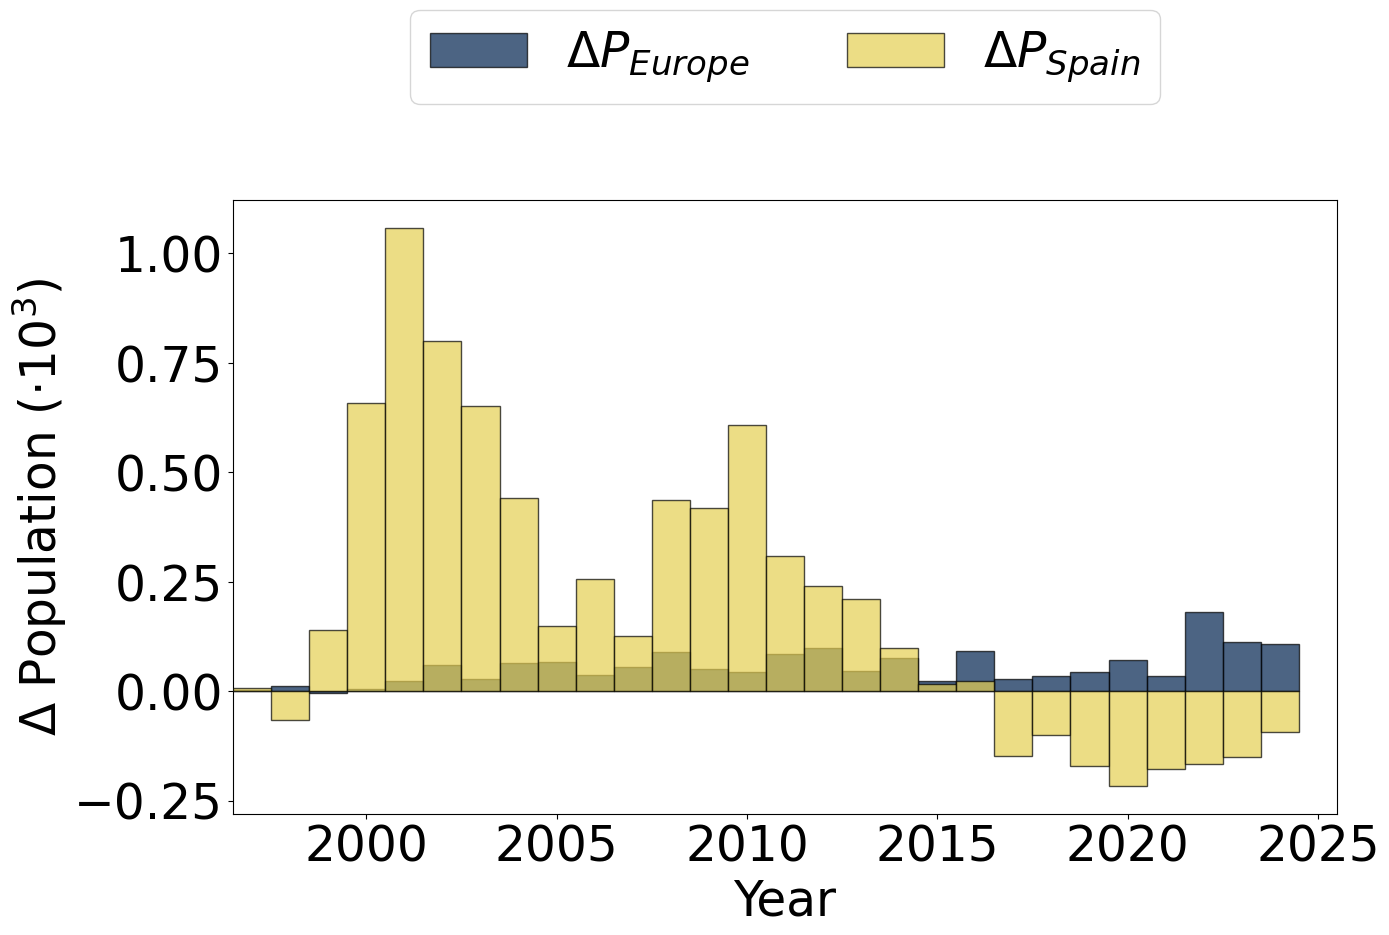

Sant Gervasi - la Bonanova


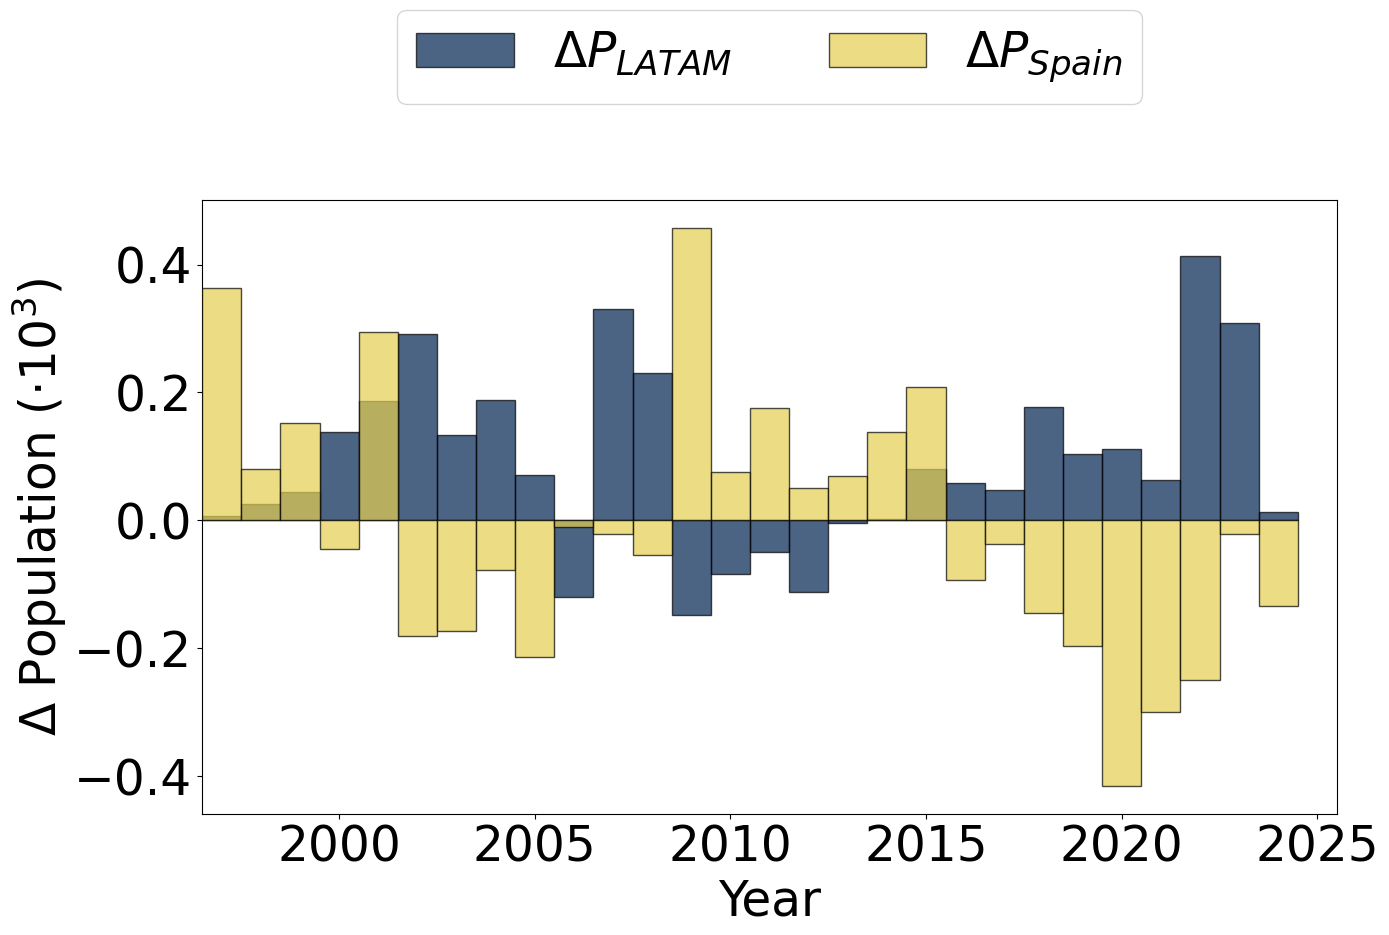

Verdun


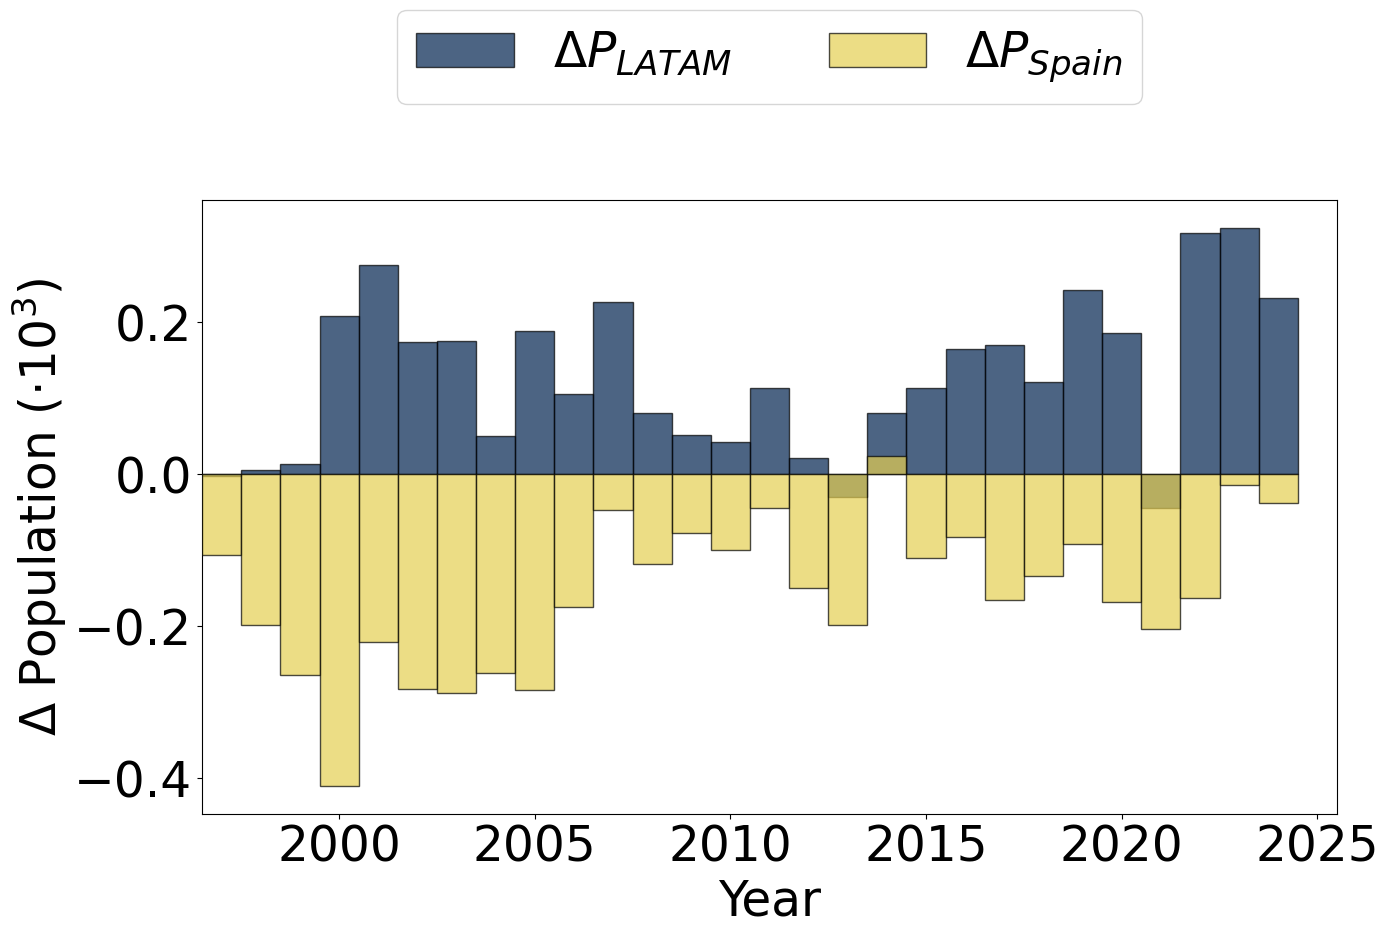

High rent distric, LATAM
Sarrià-Sant Gervasi


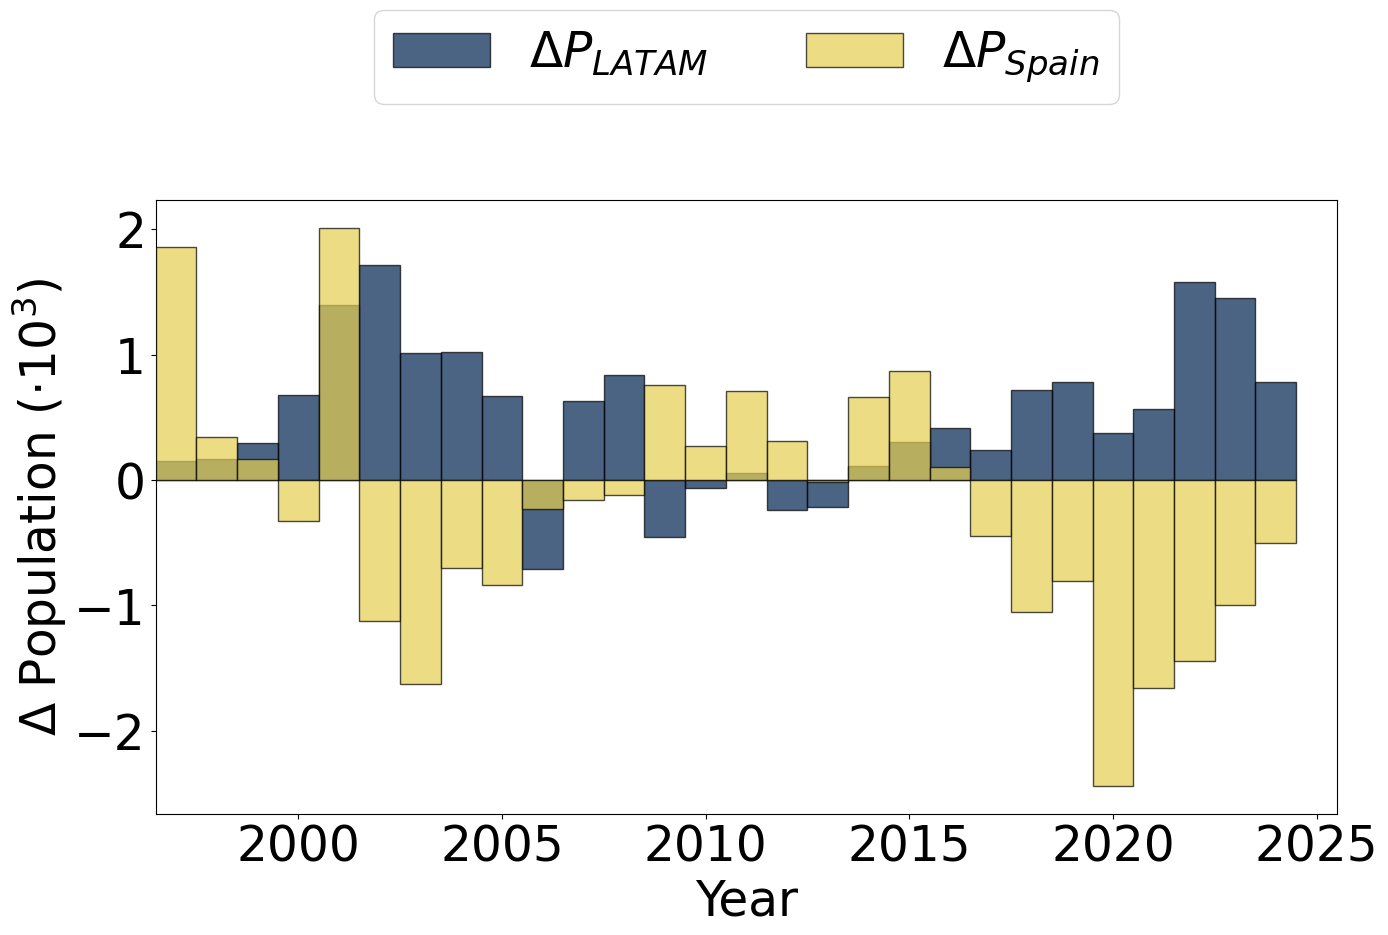

Medium rent district, LATAM
Horta-Guinardó


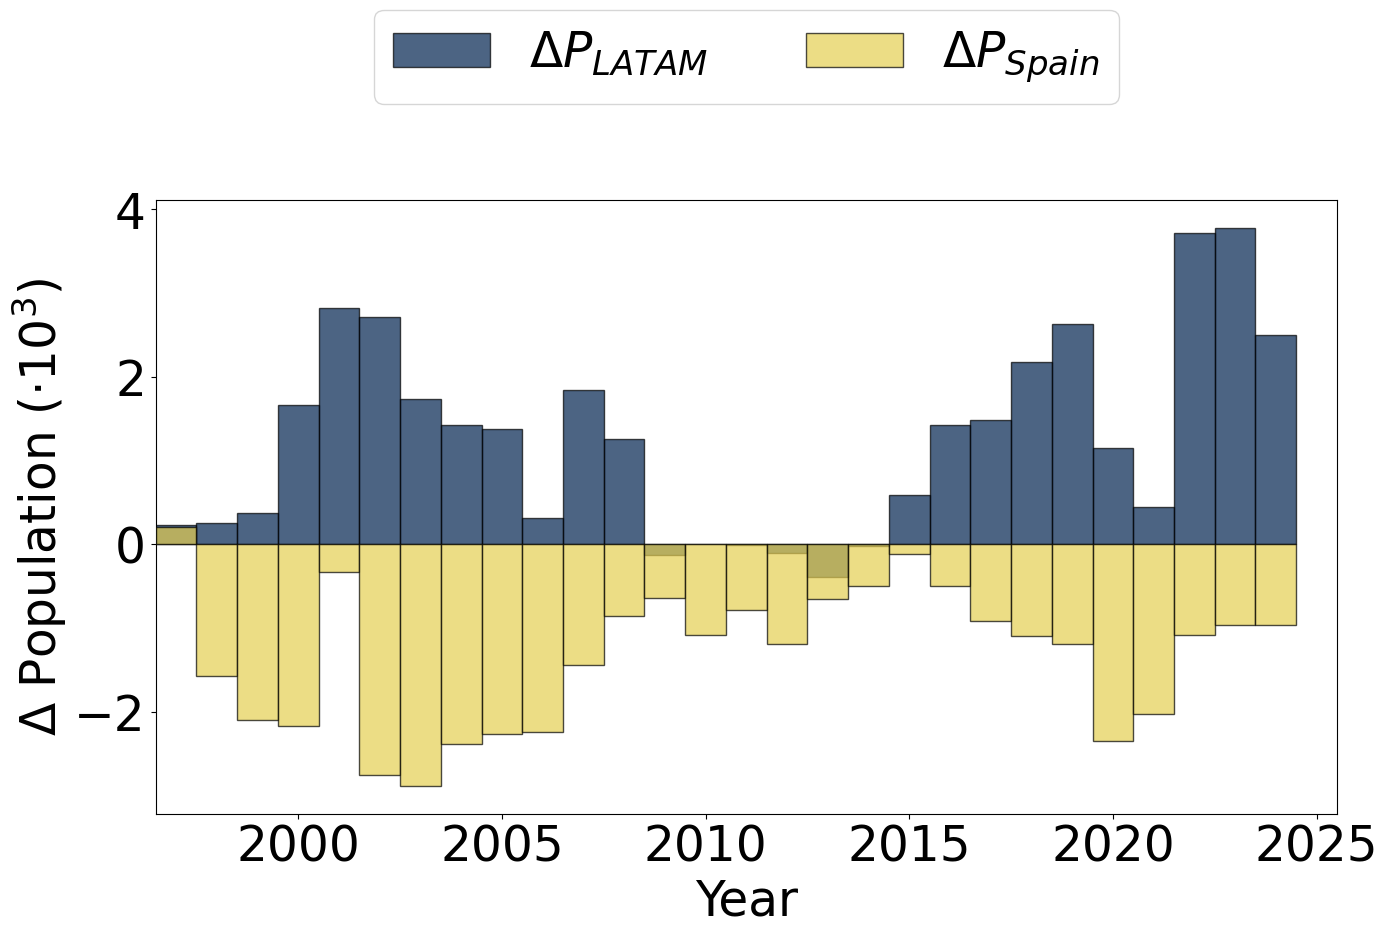

Districte pobre, LATAM
Nou Barris


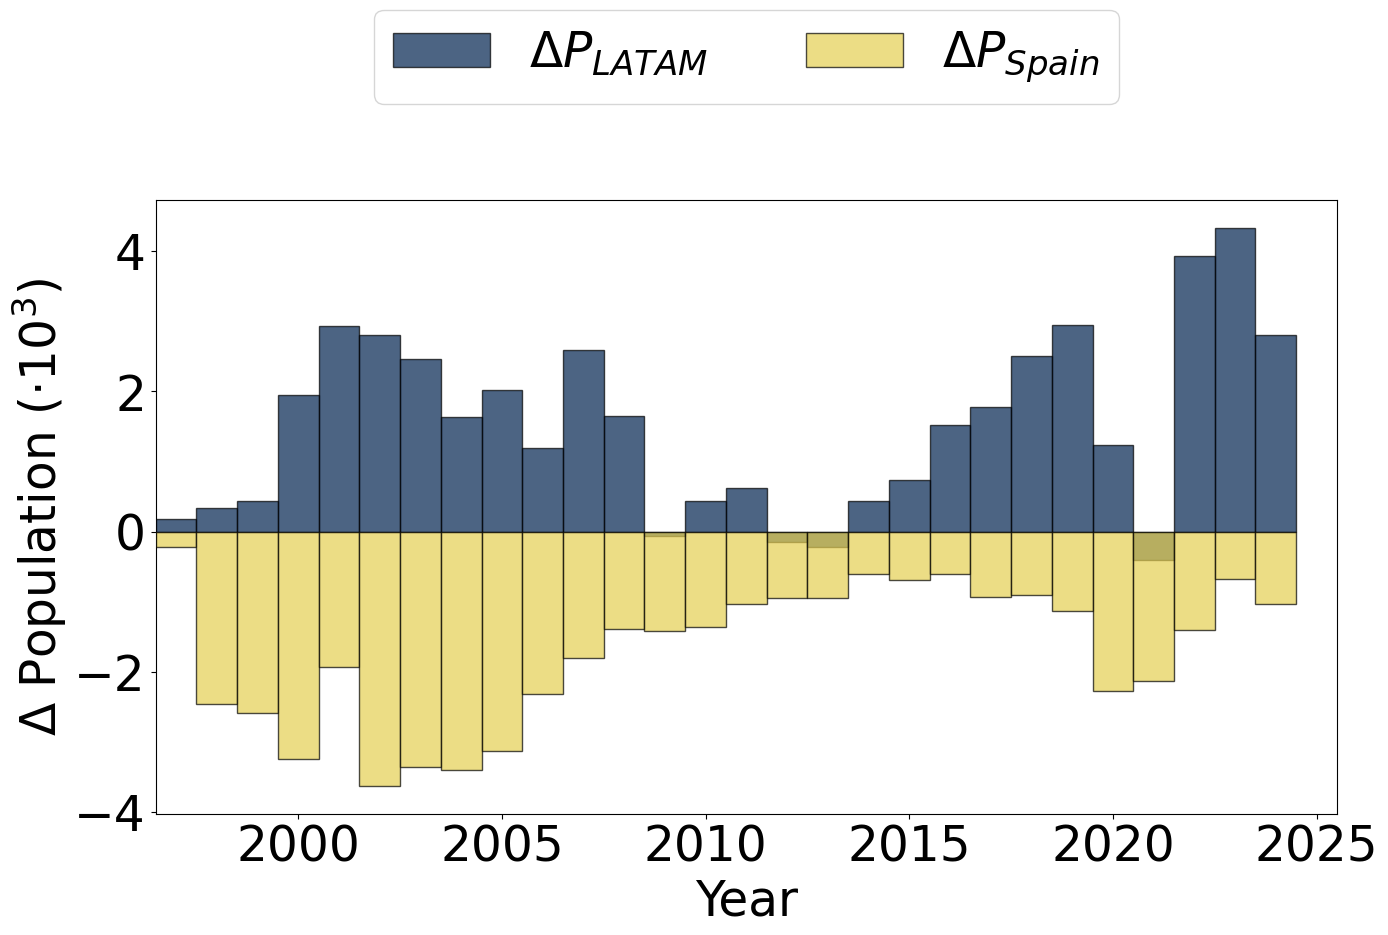

BCN


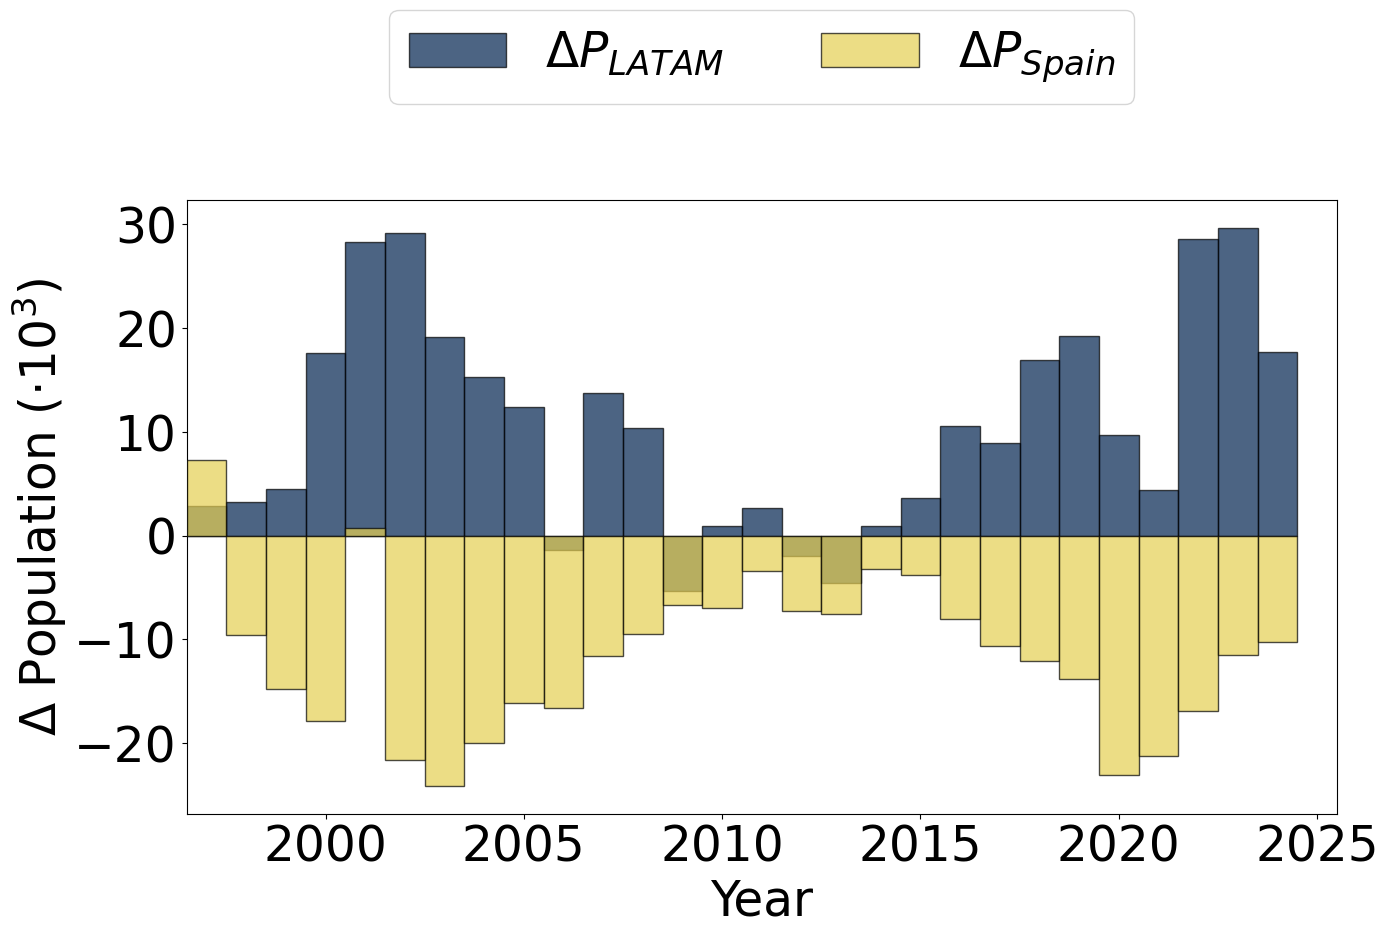

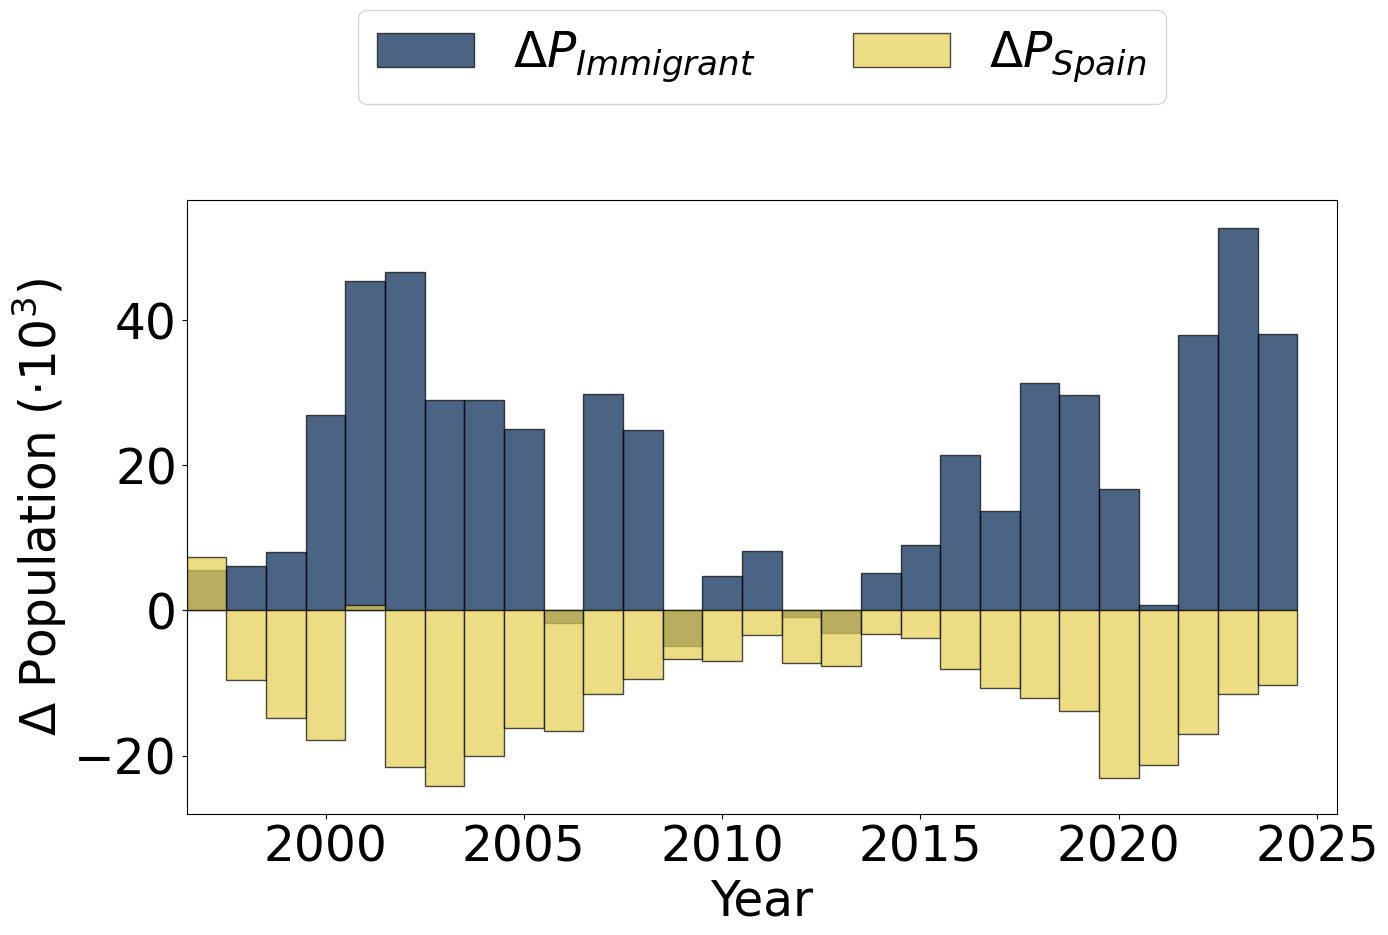

In [57]:
#neighbrhoods to study
barris=["el Raval","el Barri Gòtic","Sarrià","Diagonal Mar i el Front Marítim del Poblenou","Sant Gervasi - la Bonanova","Verdun"]
#region to study
regio=[3,3,4,4,2,2]
regio_label=["Rest_of_Asia","Rest_of_Asia","Europe","Europe","LATAM","LATAM"]

for i in range(6):
    print(barris[i])
    df_1=region_zone_study(region_list[regio[i]],barris[i],"Neighborhood")
    bar_plot(df_1,regio_label[i],barris[i],"Neighborhood")

#rent differences for the LATAM population
print("High rent distric, LATAM")
print("Sarrià-Sant Gervasi")
df_1=region_zone_study(region_list[2],"Sarrià-Sant Gervasi","District")
bar_plot(df_1,"LATAM","Sarrià-Sant Gervasi","District")

print("Medium rent district, LATAM")
print("Horta-Guinardó")
df_1=region_zone_study(region_list[2],"Horta-Guinardó","District")
bar_plot(df_1,"LATAM","Horta-Guinardó","District")

print("Districte pobre, LATAM")
print("Nou Barris")
df_1=region_zone_study(region_list[2],"Nou Barris","District")
bar_plot(df_1,"LATAM","Nou Barris","District")

print("BCN")
df_1_BCN=region_BCN(region_list[2])
bar_plot(df_1_BCN,"LATAM","BCN","city")

#all immigration in BCN
immigration_list=[]
for i in region_list:
    for j in i:
        immigration_list.append(j)
    
df_im_BCN=region_BCN(immigration_list)
bar_plot(df_im_BCN,"Immigrant","BCN_2","city")

In [58]:
#now we will compare the LATAM"s immigration and Spain-born emigration with the evolution of the unemployement rate

#reading the file
# Define data path
dataPath = "../data/"

# Read the data
file_path = dataPath+"unemployement_spain/atur_provincies.csv"
df = pd.read_csv(file_path, delimiter=";")

#we select the total :male+female
df_global=df[df["Sexo"].isin(["Ambos sexos"])].drop(columns=["Sexo"])
#barcelona 
df_BCN=df_global[df_global["Provincias"].isin(["08 Barcelona"])]\
    .drop(columns=["Provincias"])
#we adapt the number format
df_BCN["Total"] = df_BCN["Total"].str.replace(",", ".").astype(float)
#unemployement rate only
df_BCN=df_BCN[df_BCN["Tasas"].isin(["Tasa de paro de la población"])]
#decimal numbers, in order to get a proper visualization we substract 0.5
df_BCN["Year_decimal"] = df_BCN["Periodo"].apply(lambda x: int(x[:4]) + (int(x[5])-1)/4)-0.5
#sort by date
df_BCN = df_BCN.sort_values("Year_decimal")

display(df_BCN)
display(df_1_BCN) #from the previous cell

#saving the data frames
create_csv("unemployment_rate_province_BCN",df_BCN)
create_csv("LATAM_BCN_difference",df_1_BCN)

,Tasas,Periodo,Total,Year_decimal
2754,Tasa de paro de la población,2002T1,11.12,2001.50
2753,Tasa de paro de la población,2002T2,9.82,2001.75
2752,Tasa de paro de la población,2002T3,10.76,2002.00
2751,Tasa de paro de la población,2002T4,11.43,2002.25
2750,Tasa de paro de la población,2003T1,11.32,2002.50
...,...,...,...,...
2664,Tasa de paro de la población,2024T3,8.78,2024.00
2663,Tasa de paro de la población,2024T4,7.41,2024.25
2662,Tasa de paro de la población,2025T1,8.66,2024.50
2661,Tasa de paro de la población,2025T2,7.93,2024.75


,Year_Reference,D_ESP,D_WR
1,1998,7295.0,2831.0
2,1999,-9612.0,3218.0
3,2000,-14850.0,4501.0
4,2001,-17853.0,17620.0
5,2002,686.0,28277.0
6,2003,-21612.0,29177.0
7,2004,-24145.0,19140.0
8,2005,-20026.0,15270.0
9,2006,-16144.0,12359.0
10,2007,-16647.0,-1434.0


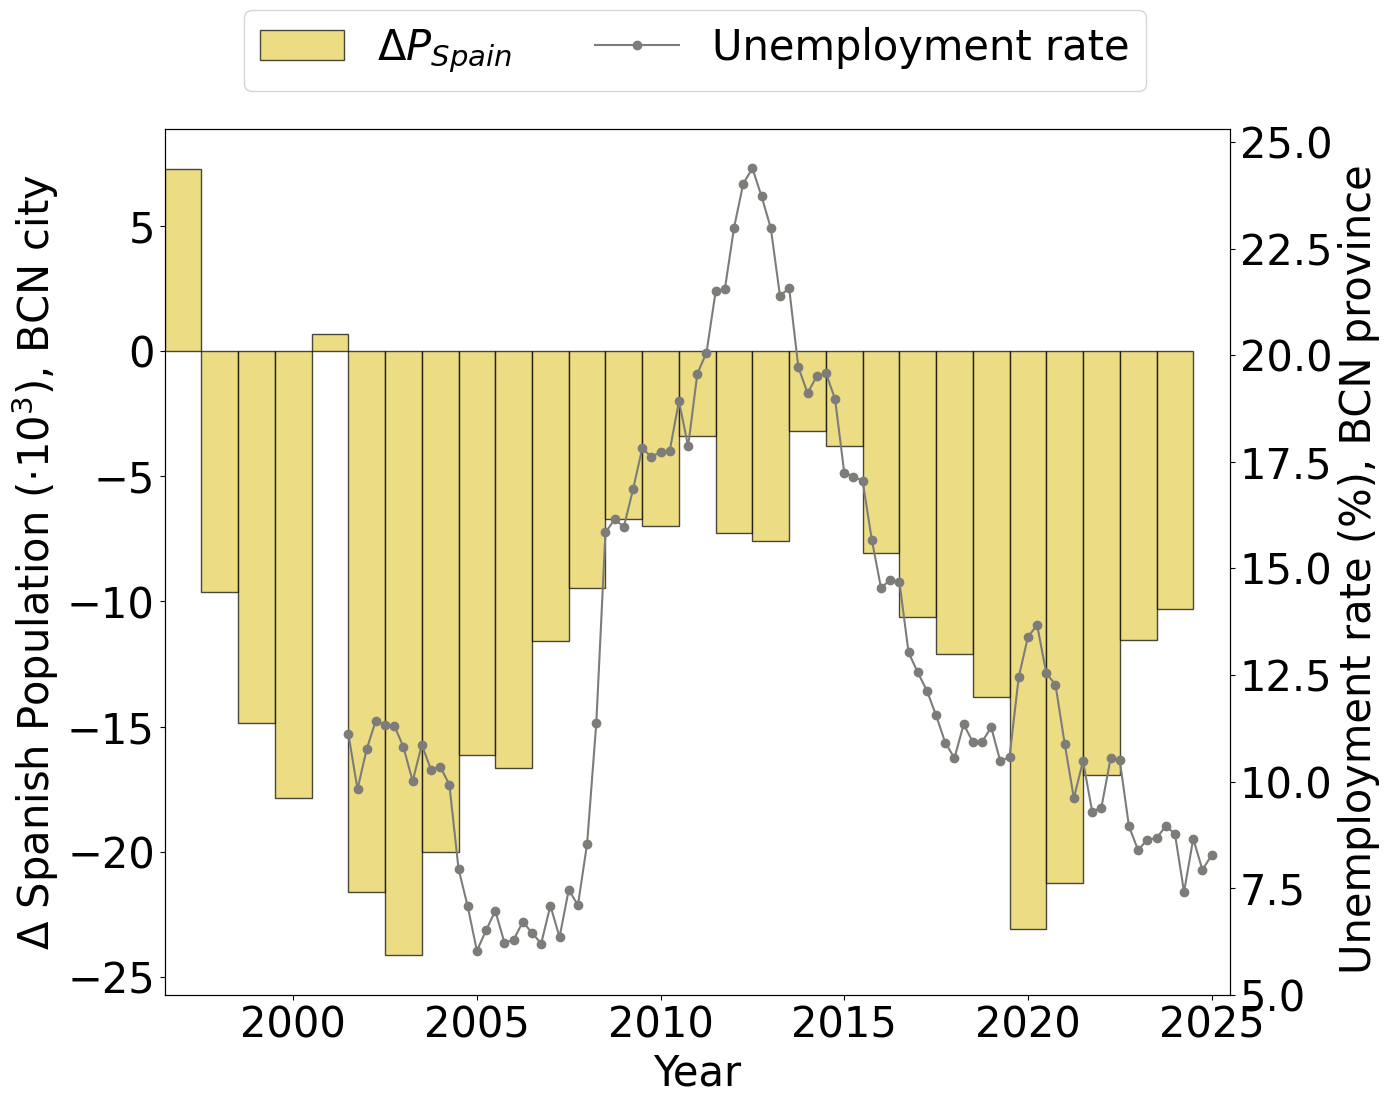

In [59]:
#Spanish population graphic

data_frame=df_1_BCN
df = data_frame.copy()
df = df.dropna(subset=["Year_Reference", "D_ESP", "D_WR"])
df["Year_Reference"] = df["Year_Reference"].astype(int)

fig, ax = plt.subplots(figsize=(14, 10))
bar_width = 1.0 

cmap = plt.get_cmap("cividis")

#Bars
x_bar = df["Year_Reference"]
y_ESP = df["D_ESP"]/1000

ax.bar(x_bar-1, y_ESP, width=bar_width, alpha=0.7, label=r"$\Delta P_{Spain}$", color=cmap(0.9),edgecolor="black",\
        zorder=10)

# unemployement rate
ax2 = ax.twinx()
ax2.plot(df_BCN["Year_decimal"], df_BCN["Total"], marker="o", color=cmap(0.5), label="Unemployment rate")
ax2.set_ylabel(r"Unemployment rate (%), BCN province ",fontsize=30)
ax2.set_yticks(np.arange(5,26,2.5))

ax.set_xticks(x_bar[2::5])
ax.set_xticklabels(df["Year_Reference"].astype(str)[2::5])

#axis
ax.set_xlim(1996.5, 2025.5)
ax.set_xlabel("Year",fontsize=30)
ax.set_ylabel(r"$\Delta$ Spanish Population (·$10^3$), BCN city",fontsize=30)
ax.tick_params(axis="both", labelsize=30)
ax2.tick_params(axis="both", labelsize=30)
#legend
handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
all_handles = handles1 + handles2
all_labels = labels1 + labels2

fig.legend(
    all_handles, all_labels,
    loc="upper center", bbox_to_anchor=(0.5, 1.12), ncol=2, fontsize=30
)
plt.tight_layout()
plt.savefig(figure_path+"unemployement1.pdf", bbox_inches="tight")
plt.savefig(figure_path+"unemployement1.png", bbox_inches="tight")
plt.show()



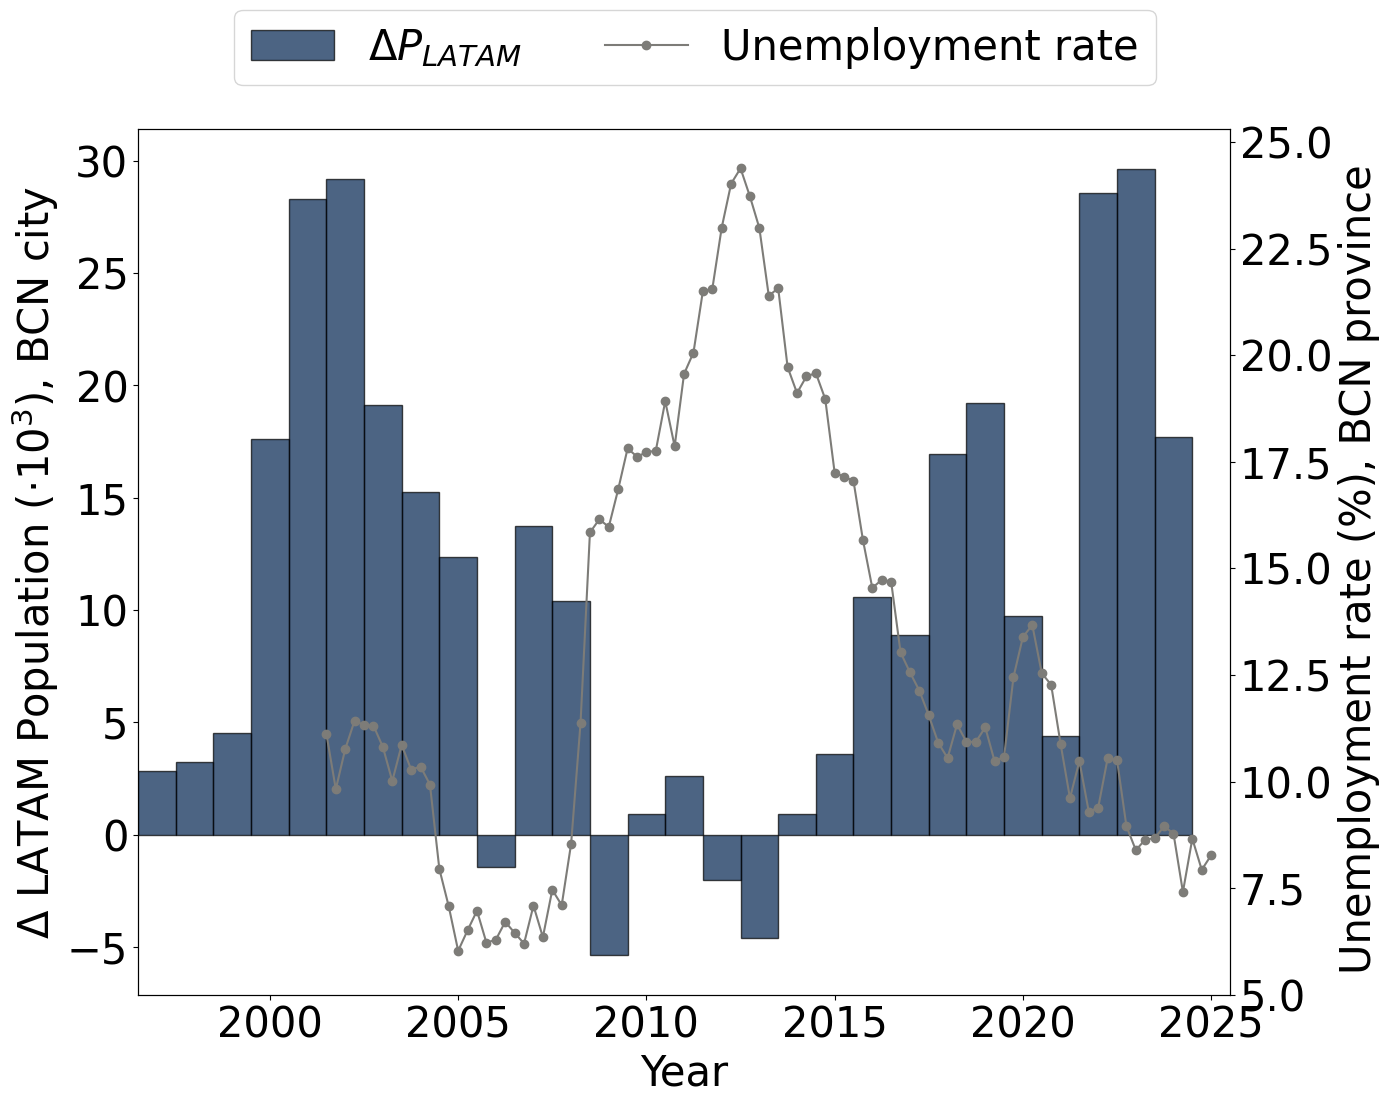

In [60]:
#LATAM population graphic

data_frame=df_1_BCN
df = data_frame.copy()
df = df.dropna(subset=["Year_Reference", "D_ESP", "D_WR"])
df["Year_Reference"] = df["Year_Reference"].astype(int)

fig, ax = plt.subplots(figsize=(14, 10))
bar_width = 1.0 

cmap = plt.get_cmap("cividis")

#Bars
x_bar = df["Year_Reference"]
y_WR = df["D_WR"]*(+1)/1000

ax.bar(x_bar-1, y_WR, width=bar_width, alpha=0.7, label=r"$\Delta P_{LATAM}$", color=cmap(0),edgecolor="black",\
        zorder=10)

# unemployement rate
ax2 = ax.twinx()
ax2.plot(df_BCN["Year_decimal"], df_BCN["Total"], marker="o", color=cmap(0.5), label="Unemployment rate")
ax2.set_yticks(np.arange(5,26,2.5))
ax2.set_ylabel(r"Unemployment rate (%), BCN province ",fontsize=30)


ax.set_xticks(x_bar[2::5])
ax.set_xticklabels(df["Year_Reference"].astype(str)[2::5])
#axis and grid
#left_edges = x_bar - bar_width/2
#right_edges = x_bar + bar_width/2
#edge_positions = np.sort(np.concatenate([left_edges, right_edges]))
#ax.set_xticks(edge_positions, minor=True)
#ax.grid(axis="x", which="minor", alpha=0.6, zorder=0,color="black")
#ax.grid(axis="y", alpha=0.6, zorder=0,color="black")
#axis
ax.set_xlim(1996.5, 2025.5)
ax.set_xlabel("Year",fontsize=30)
ax.set_ylabel(r"$\Delta$ LATAM Population (·$10^3$), BCN city",fontsize=30)
ax.tick_params(axis="both", labelsize=30)
ax2.tick_params(axis="both", labelsize=30)
#legend
handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
all_handles = handles1 + handles2
all_labels = labels1 + labels2

fig.legend(
    all_handles, all_labels,
    loc="upper center", bbox_to_anchor=(0.5, 1.12), ncol=2, fontsize=30
)
plt.tight_layout()
plt.savefig(figure_path+"unemployement2.pdf", bbox_inches="tight")
plt.savefig(figure_path+"unemployement2.png", bbox_inches="tight")
plt.show()

